# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os

%matplotlib inline

In [2]:
# Download mass shooting data from https://datawrapper.dwcdn.net/pvLFI/4/ into PUIdata directory
filename = "data-pvLFI.csv"
mass_shooting_df = pd.read_csv(os.getenv("PUIDATA") + "/" + filename)
mass_shooting_df.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [3]:
# Download population data from http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
filename = "API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv"
pop_df = pd.read_csv(os.getenv("PUIDATA") + "/" + filename, skiprows=3)  # Skip the first few lines in the file
pop_df.drop(pop_df.columns.difference(["Country Name", "2017"]), 1, inplace=True)
pop_df.rename(index=str, columns={"2017": "Population"}, inplace=True)
pop_df.head()

,Country Name,Population
0,Aruba,105264.0
1,Afghanistan,35530081.0
2,Angola,29784193.0
3,Albania,2873457.0
4,Andorra,76965.0


In [4]:
# Download GDP data from http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
filename = "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv"
gdp_df = pd.read_csv(os.getenv("PUIDATA") + "/" + filename, skiprows=3)  # Skip the first few lines in the file
gdp_df.drop(gdp_df.columns.difference(["Country Name", "2017"]), 1, inplace=True)
gdp_df.rename(index=str, columns={"2017": "GDP"}, inplace=True)
gdp_df.head()

,Country Name,GDP
0,Aruba,NaN
1,Afghanistan,2.081530e+10
2,Angola,1.242094e+11
3,Albania,1.303935e+10
4,Andorra,3.012914e+09


In [5]:
firearms_df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")
firearms_df.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [6]:
merged = mass_shooting_df.merge(pop_df, left_on="Country", right_on="Country Name")
merged = merged.merge(gdp_df, left_on="Country", right_on="Country Name")
merged_full = merged.merge(firearms_df, left_on="Country", right_on="Country/Territory") 
merged_full.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name_x,Population,Country Name_y,GDP,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,15.0,4,Australia,24598933.0,Australia,1.323421e+12,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,30.4,1,Austria,8809212.0,Austria,4.165957e+11,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Belgium,17.2,2,Belgium,11372068.0,Belgium,4.926813e+11,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0
3,Canada,30.8,4,Canada,36708083.0,Canada,1.653043e+12,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0
4,Denmark,12.0,0,Denmark,5769603.0,Denmark,3.248720e+11,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0


In [7]:
df = merged_full.drop(merged_full.columns.difference(["Country Name", 
                                                      "Average total all civilian firearms", 
                                                      "Population",
                                                      "GDP",
                                                      "Number of homicides by firearm",
                                                      "Country",
                                                      "Guns per 100 inhabitants",
                                                      "Number of mass shootings (1983-2013)"]), 1)
df.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Population,GDP,Number of homicides by firearm,Average total all civilian firearms
0,Australia,15.0,4,24598933.0,1.323421e+12,30.0,3050000.0
1,Austria,30.4,1,8809212.0,4.165957e+11,18.0,2500000.0
2,Belgium,17.2,2,11372068.0,4.926813e+11,70.0,1800000.0
3,Canada,30.8,4,36708083.0,1.653043e+12,173.0,9950000.0
4,Denmark,12.0,0,5769603.0,3.248720e+11,15.0,650000.0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [8]:
df["shootingspp"] = df['Number of mass shootings (1983-2013)'] / df["Population"]

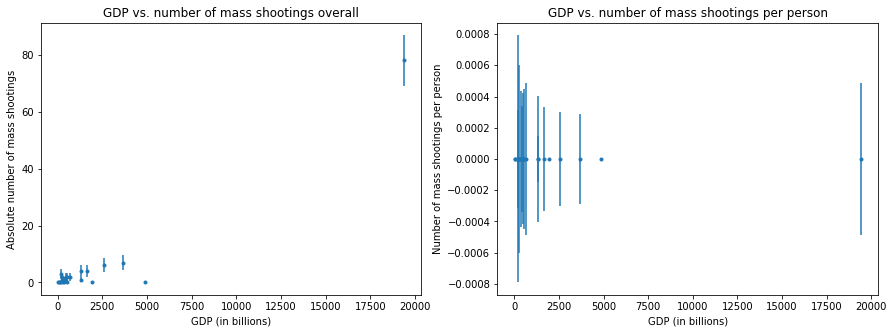

In [9]:
fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(121)

#scatter = ax.scatter(df.GDP / 1e9, df['Number of mass shootings (1983-2013)'])
ax.errorbar(df.GDP / 1e9, 
            df['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df['Number of mass shootings (1983-2013)'] * 1.0), 
            fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Absolute number of mass shootings")
ax.set_ylim()
ax.set_title("GDP vs. number of mass shootings overall")

ax = fig.add_subplot(122)
ax.errorbar(df.GDP / 1e9, 
            df["shootingspp"], 
            yerr = np.sqrt(df["shootingspp"] * 1.0), 
            fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
ax.set_title("GDP vs. number of mass shootings per person")

pl.show()

### Figure 1: GDP vs. number of overall mass shootings, and number of mass shootings per person. The outlier is the USA. On the left, you can see that it has a much greater number of mass shootings overall, but the per-person number is not significantly greater than that of other countries

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

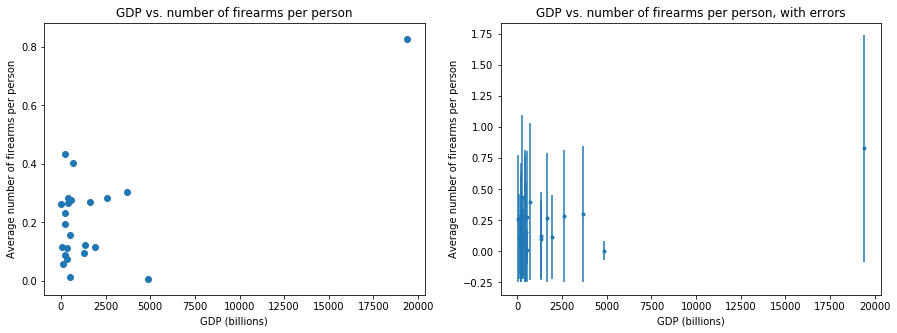

In [10]:
df['firearms_pp'] = df["Average total all civilian firearms"] / df["Population"]

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(121)

ax.scatter(df.GDP / 1e9, 
           df['firearms_pp'])
ax.set_xlabel("GDP (billions)")
ax.set_ylabel("Average number of firearms per person")
ax.set_ylim()
ax.set_title("GDP vs. number of firearms per person")

ax = fig.add_subplot(122)
ax.errorbar(df.GDP / 1e9, 
            df['firearms_pp'],
            yerr=np.sqrt(df['firearms_pp'] * 1.0), 
            fmt=".")
ax.set_xlabel("GDP (billions)")
ax.set_ylabel("Average number of firearms per person")
ax.set_ylim()
ax.set_title("GDP vs. number of firearms per person, with errors")

pl.show()

### Figure 2: The number of firearms per person for each country, related to GDP. The plot on the right show the same data, but with error bars. One can see that the USA (again in the top right) has the greatest number of firearms per person, although with the error plotted this seems less significant, because the error bars extend into the range of the points for the other countries.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

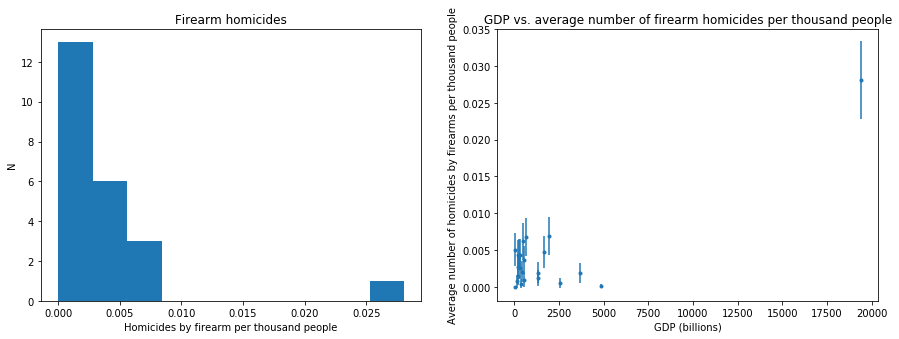

In [11]:
fig = pl.figure(figsize=(15,5)) 

ax = fig.add_subplot(121)
ax.hist(df["Number of homicides by firearm"] / df["Population"] * 1e3)
ax.set_xlabel("Homicides by firearm per thousand people")
ax.set_ylabel("N")
ax.set_title("Firearm homicides")

ax = fig.add_subplot(122)
ax.errorbar(df["GDP"] / 1e9,
            df["Number of homicides by firearm"] / df["Population"] * 1e3,
            yerr=np.sqrt(df["Number of homicides by firearm"] / df["Population"]),
            fmt="."
           )
ax.set_xlabel("GDP (billions)")
ax.set_ylabel("Average number of homicides by firearms per thousand people")
ax.set_title("GDP vs. average number of firearm homicides per thousand people")

pl.show()

### Figure 3: On the left, we show a histogram of the number of firarm homicides per thousand people, and on the right we show the average number of homicides per thousand people in relationship for each country in relationship to its GDP. The US, once again an outlier, has the greatest average number of firearm homicides, as can be seen on the right-hand side of each plot.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


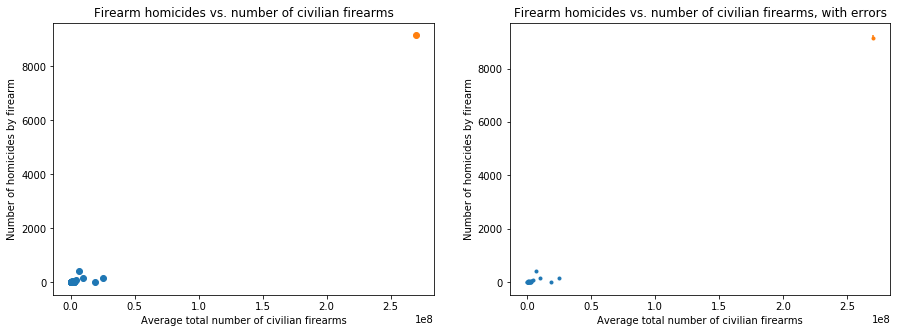

In [12]:
fig = pl.figure(figsize=(15,5)) 

ax = fig.add_subplot(121)
ax.scatter(df["Average total all civilian firearms"].loc[df["Country"] != "United States"],
           df["Number of homicides by firearm"].loc[df["Country"] != "United States"],
          )
ax.scatter(df["Average total all civilian firearms"].loc[df["Country"] == "United States"],  # Plot US separately
           df["Number of homicides by firearm"].loc[df["Country"] == "United States"]   # to get new color
          )
ax.set_xlabel("Average total number of civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_title("Firearm homicides vs. number of civilian firearms")

ax = fig.add_subplot(122)
ax.errorbar(df["Average total all civilian firearms"].loc[df["Country"] != "United States"],
            df["Number of homicides by firearm"].loc[df["Country"] != "United States"],
            yerr=np.sqrt(df["Number of homicides by firearm"].loc[df["Country"] != "United States"]),
            fmt="."
           )
ax.errorbar(df["Average total all civilian firearms"].loc[df["Country"] == "United States"],
            df["Number of homicides by firearm"].loc[df["Country"] == "United States"],
            yerr=np.sqrt(df["Number of homicides by firearm"].loc[df["Country"] == "United States"]),
            fmt="."
           )
ax.set_xlabel("Average total number of civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_title("Firearm homicides vs. number of civilian firearms, with errors")

pl.show()

### Figure 4: Average total number of civilian firearms vs. number of firearm homicides, with and without statistical errors. The US, our outlier in the data, is shown in orange and has both a much greater number of civilian firearms and a much greater number of firearm homicides than the other countries.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


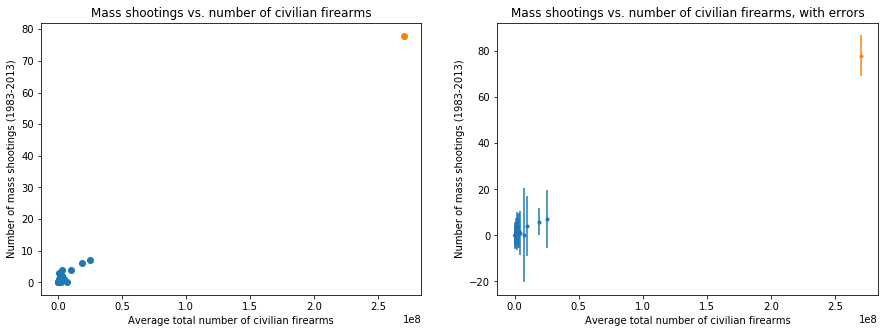

In [13]:
fig = pl.figure(figsize=(15,5)) 

ax = fig.add_subplot(121)
ax.scatter(df["Average total all civilian firearms"].loc[df["Country"] != "United States"],
           df["Number of mass shootings (1983-2013)"].loc[df["Country"] != "United States"],
          )
ax.scatter(df["Average total all civilian firearms"].loc[df["Country"] == "United States"],  # Plot US separately
           df["Number of mass shootings (1983-2013)"].loc[df["Country"] == "United States"]   # to get new color
          )
ax.set_xlabel("Average total number of civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_title("Mass shootings vs. number of civilian firearms")

ax = fig.add_subplot(122)
ax.errorbar(df["Average total all civilian firearms"].loc[df["Country"] != "United States"],
            df["Number of mass shootings (1983-2013)"].loc[df["Country"] != "United States"],
            yerr=np.sqrt(df["Number of homicides by firearm"].loc[df["Country"] != "United States"]),
            fmt="."
           )
ax.errorbar(df["Average total all civilian firearms"].loc[df["Country"] == "United States"],
            df["Number of mass shootings (1983-2013)"].loc[df["Country"] == "United States"],
            yerr=np.sqrt(df["Number of mass shootings (1983-2013)"].loc[df["Country"] == "United States"]),
            fmt="."
           )
ax.set_xlabel("Average total number of civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_title("Mass shootings vs. number of civilian firearms, with errors")

pl.show()

### Figure 5: Average total number of civilian firearms vs. number of mass shootings in each country during the period from 1983 to 2013, with and without statistical errors. The US, our outlier in the data, is shown in orange and has both a much greater number of civilian firearms and has experienced a much greater number of mass shootings.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [91]:
ols_fit = sm.OLS(df["Number of mass shootings (1983-2013)"], 
               #df["Average total all civilian firearms"] / 1e7   # Divide by order of magnitude of the mean of this series
               df["Average total all civilian firearms"]
              ).fit()
ols_fit.summary()
ols_b = ols_fit.params.iloc[0]

In [147]:
weights = 1/np.sqrt(df["Number of mass shootings (1983-2013)"])
# Remove all infinity values and replace them with ones
weights_adj = [w if w != np.inf else 1 for w in weights] 
wls_fit = sm.WLS(df["Number of mass shootings (1983-2013)"], 
                 df["Average total all civilian firearms"],
                 weights=weights_adj
                ).fit()
wls_fit.summary()
wls_b = wls_fit.params.iloc[0]
weights_adj

[0.5,
 1.0,
 0.70710678118654746,
 0.5,
 1,
 0.70710678118654746,
 0.40824829046386307,
 0.3779644730092272,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.57735026918962584,
 1.0,
 1,
 1.0,
 1.0,
 0.70710678118654746,
 0.70710678118654746,
 0.11322770341445956]

In [149]:
(a, b) = np.polyfit(df["Average total all civilian firearms"],
                    df["Number of mass shootings (1983-2013)"],
                    1  # Fit a first-degree polynomial a.k.a. line
                   )

2.86963799941e-07
0.463978684189


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


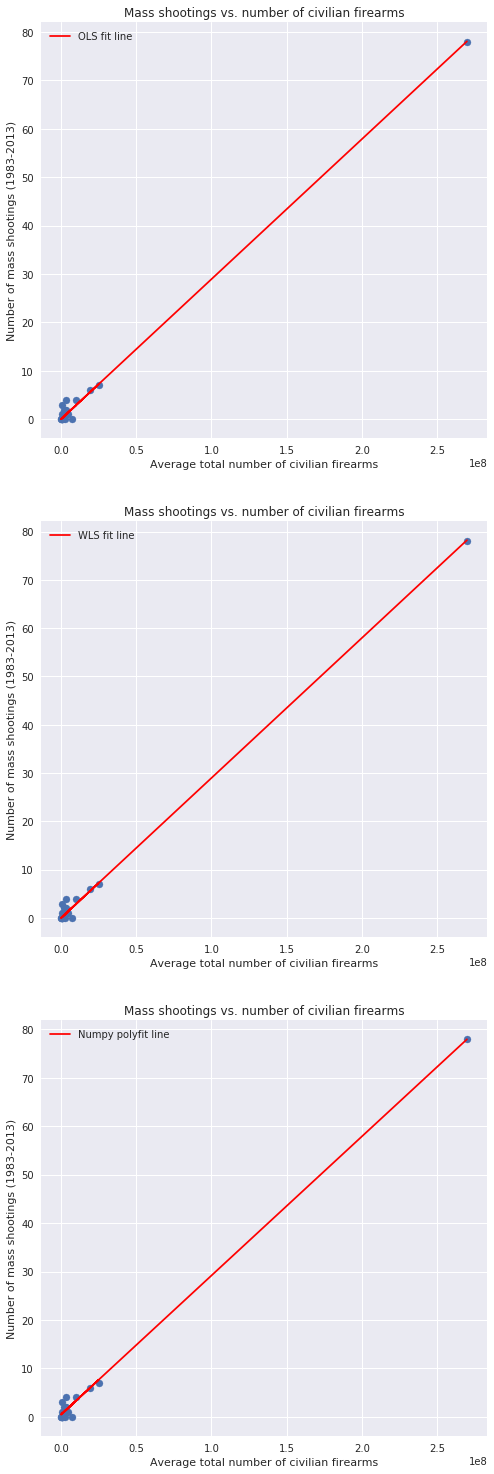

In [154]:
fig = pl.figure(figsize=(8,26))

ax = fig.add_subplot(311)
ax.scatter(df["Average total all civilian firearms"], 
           df["Number of mass shootings (1983-2013)"],
           label=None
          )
ax.plot(df["Average total all civilian firearms"],
        df["Average total all civilian firearms"] * ols_b,
        label="OLS fit line",
        color="red"
       )
ax.set_xlabel("Average total number of civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_title("Mass shootings vs. number of civilian firearms")
ax.legend()

ax = fig.add_subplot(312)
ax.scatter(df["Average total all civilian firearms"], 
           df["Number of mass shootings (1983-2013)"],
           label=None
          )
ax.plot(df["Average total all civilian firearms"],
        df["Average total all civilian firearms"] * wls_b,
        label="WLS fit line",
        color="red"
       )
ax.set_xlabel("Average total number of civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_title("Mass shootings vs. number of civilian firearms")
ax.legend()

ax = fig.add_subplot(313)
ax.scatter(df["Average total all civilian firearms"], 
           df["Number of mass shootings (1983-2013)"],
           label=None
          )
ax.plot(df["Average total all civilian firearms"],
        df["Average total all civilian firearms"] * a + b,
        label="Numpy polyfit line",
        color="red"
       )
ax.set_xlabel("Average total number of civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_title("Mass shootings vs. number of civilian firearms")
ax.legend()

### Figure 6: three plots of the average total number of civilian firearms vs. number of mass shootings in each country during the period from 1983 to 2013. Linear regressions were fitted using statsmodels and numpy modules: OLS, WLS, and polyfit, respectively.

In [24]:
import seaborn as sns
import statsmodels.api as sm

Average total all civilian firearms    2.892181e-07
dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


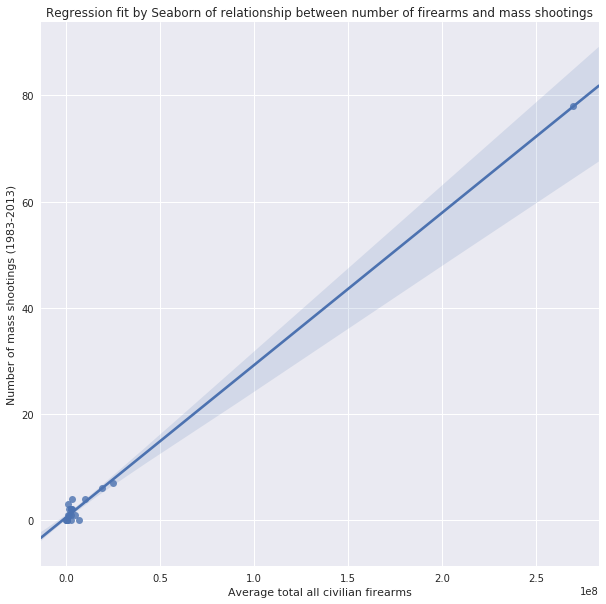

In [28]:
ax = sns.regplot(x=df["Average total all civilian firearms"],
                 y=df["Number of mass shootings (1983-2013)"]
                )
ax.set_title("Regression fit by Seaborn of relationship between number of firearms and mass shootings")

### Figure 7: same data as the previous plots, but using seaborn to create a regression plot using the regplot function.

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [15]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

FileNotFoundError: [Errno 2] No such file or directory: '../Lab5_fb55/confidence_intervals_regression.png'

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings